Copyright (c) Microsoft Corporation. All rights reserved. Licensed under the MIT License.

# Randomly generated CyberBattle network environment for Active Directory

In [40]:
from cyberbattle.simulation.model import *
import cyberbattle.samples.active_directory.generate_ad as ad
import cyberbattle.simulation.commandcontrol as commandcontrol
import logging, sys, random
random.seed(0)
logging.basicConfig(stream=sys.stdout, level=logging.INFO, format="%(levelname)s: %(message)s")


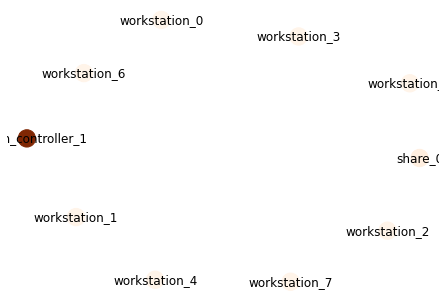

In [32]:
env = ad.new_random_environment()
env.plot_environment_graph()

In [33]:
c2 = commandcontrol.CommandControl(env)
dbg = commandcontrol.EnvironmentDebugging(c2)

# 1 - Start from client
dbg.plot_discovered_network()
c2.print_all_attacks()

,id,status,properties,local_attacks,remote_attacks
0,workstation_0,owned,[breach_node],"[EnumerateFileShares, ProbeAdmin, FindDomainCo...",[]


In [34]:
outcome = c2.run_attack('workstation_0', 'FindDomainControllers')
dbg.plot_discovered_network()
c2.print_all_attacks()

INFO: discovered node: domain_controller_1
INFO: GOT REWARD: Found domain controllers


,id,status,properties,local_attacks,remote_attacks
0,workstation_0,owned,[breach_node],"[EnumerateFileShares, ProbeAdmin, FindDomainCo...",[]
1,domain_controller_1,discovered,NaN,None,[]


In [35]:
outcome = c2.run_attack('workstation_0', 'EnumerateFileShares')
dbg.plot_discovered_network()
c2.print_all_attacks()

INFO: discovered node: share_0
INFO: GOT REWARD: Found shares


,id,status,properties,local_attacks,remote_attacks
0,workstation_0,owned,[breach_node],"[EnumerateFileShares, ProbeAdmin, FindDomainCo...",[]
1,domain_controller_1,discovered,NaN,None,[]
2,share_0,discovered,NaN,None,[]


In [36]:
outcome = c2.run_attack("workstation_0", "AuthorizationSpoofAndCrack")
dbg.plot_discovered_network()
c2.print_all_attacks()

INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_16')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_9')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_12')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_15')
INFO: discovered node: workstation_0
INFO: discovered credential: CachedCredential(node='workstation_0', port='SHELL', credential='user_16')
INFO: discovered node: workstation_1
INFO: discovered credential: CachedCredential(node='workstation_1', port='SHELL', credential='user_9')
INFO: discovered node: workstation_4
INFO: discovered credential: CachedCredential(node='workstation_4', port='SHELL', credential='user_12')
INFO: discovered node: workstation_7
INFO: discovered credential: Cache

,id,status,properties,local_attacks,remote_attacks
0,workstation_0,owned,[breach_node],"[EnumerateFileShares, ProbeAdmin, FindDomainCo...",[]
1,domain_controller_1,discovered,NaN,None,[]
2,share_0,discovered,NaN,None,[]
3,workstation_1,discovered,NaN,None,[]
4,workstation_4,discovered,NaN,None,[]
5,workstation_7,discovered,NaN,None,[]


In [37]:
c2.connect_and_infect("workstation_0", "workstation_4", "SHELL", "user_12")
dbg.plot_discovered_network()
c2.print_all_attacks()

INFO: Infected node 'workstation_4' from 'workstation_0' via SHELL with credential 'user_12'


,id,status,properties,local_attacks,remote_attacks
0,workstation_0,owned,[breach_node],"[EnumerateFileShares, ProbeAdmin, FindDomainCo...",[]
1,workstation_4,owned,[admin],"[EnumerateFileShares, ProbeAdmin, FindDomainCo...",[]
2,domain_controller_1,discovered,NaN,None,[]
3,share_0,discovered,NaN,None,[]
4,workstation_1,discovered,NaN,None,[]
5,workstation_7,discovered,NaN,None,[]


In [38]:
c2.run_attack('workstation_4', 'ScanForCreds')
dbg.plot_discovered_network()
c2.print_all_attacks()


INFO: discovered node: domain_controller_1
INFO: discovered credential: CachedCredential(node='domain_controller_1', port='AD', credential='dc_1')
INFO: GOT REWARD: DA credentials found


,id,status,properties,local_attacks,remote_attacks
0,workstation_0,owned,[breach_node],"[EnumerateFileShares, ProbeAdmin, FindDomainCo...",[]
1,workstation_4,owned,[admin],"[EnumerateFileShares, ProbeAdmin, FindDomainCo...",[]
2,domain_controller_1,discovered,NaN,None,[]
3,share_0,discovered,NaN,None,[]
4,workstation_1,discovered,NaN,None,[]
5,workstation_7,discovered,NaN,None,[]


In [39]:
c2.connect_and_infect("workstation_0", "domain_controller_1", "AD", "dc_1")
dbg.plot_discovered_network()
c2.print_all_attacks()


INFO: Infected node 'domain_controller_1' from 'workstation_0' via AD with credential 'dc_1'


,id,status,properties,local_attacks,remote_attacks
0,workstation_0,owned,[breach_node],"[EnumerateFileShares, ProbeAdmin, FindDomainCo...",[]
1,domain_controller_1,owned,[domain_controller],"[FindDomainControllers, EnumerateFileShares, P...",[]
2,workstation_4,owned,[admin],"[EnumerateFileShares, ProbeAdmin, FindDomainCo...",[]
3,share_0,discovered,NaN,None,[]
4,workstation_1,discovered,NaN,None,[]
5,workstation_7,discovered,NaN,None,[]


In [41]:
c2.run_attack('domain_controller_1', 'DumpNTDS')
dbg.plot_discovered_network()
c2.print_all_attacks()

INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_0')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_1')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_2')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_3')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_4')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_5')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='user_6')
INFO: discovered node: share_0
INFO: discovered credential: CachedCredential(node='share_0', port='SMB', credential='u

,id,status,properties,local_attacks,remote_attacks
0,workstation_0,owned,[breach_node],"[EnumerateFileShares, ProbeAdmin, FindDomainCo...",[]
1,domain_controller_1,owned,[domain_controller],"[FindDomainControllers, EnumerateFileShares, P...",[]
2,workstation_4,owned,[admin],"[EnumerateFileShares, ProbeAdmin, FindDomainCo...",[]
3,share_0,discovered,NaN,None,[]
4,workstation_1,discovered,NaN,None,[]
5,workstation_7,discovered,NaN,None,[]
6,workstation_2,discovered,NaN,None,[]
7,workstation_3,discovered,NaN,None,[]
8,workstation_5,discovered,NaN,None,[]
9,workstation_6,discovered,NaN,None,[]
